#                     New York City Airbnb Open Data
## Airbnb listings and metrics in NYC, NY, USA (2019)

## Table of Contents

1. [About the data and Problem Statement](#section1)<br>
2. [Importing Packages](#section1)<br>
3. [Data Loading and Description](#section2)<br>
4. [Data Pre-processing](#section1)<br>
5. [Exploratory Data Analysis](#section3)<br>
6. [Encoding the Features](#section1)<br>
7. [Correlation](#section1)<br>
8. [Preparing X and y and Splitting  into training and test datasets.](#section1)<br>
9. [Machine Learning Algorithmns](#section1)<br>
    - 9.1 [Logistic Regression](#section1)<br>
    - 9.1 [KNN Classifier](#section1)<br>
    - 9.1 [Support Vector Machine](#section1)<br>
10. [Predictions](#section1)<br>


# 1. About the data and Problem Statement

Since 2008, guests and hosts have used Airbnb to expand on traveling possibilities and present more unique, personalized way of experiencing the world. This dataset describes the listing activity and metrics in NYC, NY for 2019.

This data includes all needed information to find out more about hosts, geographical availability, necessary metrics to make predictions and draw conclusions.

goal:Have to predict, for booking whether a given location is available for 365 days or not



# 2. Importing Packages

In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import norm
from scipy import stats
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import ExtraTreesClassifier

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet

from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from math import sqrt
from sklearn.metrics import r2_score

# 3. Data loading and description

In [51]:
data=pd.read_csv("AB_NYC_2019.csv")
data.head()


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


### Description of the dataset

- This data includes all needed information to find out more about hosts, geographical availability, necessary metrics to make predictions and draw conclusions.Here in this dataset we are going to predict "availability_365" and see weather a given location is present 365 days for booking or not.
- It is a binary classification problem.

| Column Name                    | Description                                                                                |
| -------------------------------|:------------------------------------------------------------------------------------------:| 
| id                               | listing ID     
|
| name                             | name of the listing.   
| host_id                          | host ID.
| 
| host_name                        | name of the host.                                                                          | 
| neighbourhood_group              | location
|
| neighbourhood                    | area
| latitude                         | latitude coordinates 
|
| longitude                        | longitude coordinates
|                                                                 |
| room_type                        | listing space type  
|
| minimum_nights                   | amount of nights minimum.                                                                    |
| price                            | price in dollars.                                                             
|
| number_of_reviews                | number of reviews
|
| last_review                      | latest review
|
| calculated_host_listings_count   | amount of listing per host.
| 
|availability_365                  | number of days when listing is available for booking


In [52]:
data.shape

(48895, 16)

In [53]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
id                                48895 non-null int64
name                              48879 non-null object
host_id                           48895 non-null int64
host_name                         48874 non-null object
neighbourhood_group               48895 non-null object
neighbourhood                     48895 non-null object
latitude                          48895 non-null float64
longitude                         48895 non-null float64
room_type                         48895 non-null object
price                             48895 non-null int64
minimum_nights                    48895 non-null int64
number_of_reviews                 48895 non-null int64
last_review                       38843 non-null object
reviews_per_month                 38843 non-null float64
calculated_host_listings_count    48895 non-null int64
availability_365                  48895 non-null int64

- ```info``` function gives us the following insights of the dataframe:

  - There are a total of **48895  samples (rows)** and **16 columns** in the dataframe.
  
  - There are **7 columns** with a **numeric** datatype, **3 columns** with a **float** datatype and **6 columns** with an **object** datatype.
  
  - There are **missing** values in the **Name**, **host_name**, **last_review** and **reviews_per_month** column.

In [54]:
data.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


- ```describe``` function gives us the following insights into the data:
  
  - **Latitide** and **Longitude** columns are having an almost **normal distribution** because the **mean** value is close to the **median** value.

  - The distribution of **Price**, **minimum_nights**, **number_of_reviews** , **reviews_per_month**, 	**calculated_host_listings_count** and 	**availability_365** is **positive (right) skewed** because the **mean**  lies to the **right** of the **median(50%)** value , on a **distribution plot**. 
  
  - The **max** value of **Price (10000.000)** is an **outlier** because it lie far away from the mean.
  
  - Similarly comparing the **75%** and **max** values of the other columns we can see that there are **outliers** present in some other columns.

# 4. Data Pre-processing

In [55]:
unneeded_colums=['id','name','host_id','host_name']
data=data.drop(unneeded_colums,axis=1)

As 'id','name','host_id','host_name' are not so important during processing, so we are dropping it.

In [56]:
data.isna().sum()

neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [57]:
len(data['last_review'].unique())                      

1765

Because the missing vales is more and diffcult to handel we are dropping the 'last_review' column and fill the Nan values in 'reviews_per_month' with zero's.missing value tells that there are no reviews for the location.

In [58]:
data=data.drop('last_review',axis=1)
data['reviews_per_month']=data['reviews_per_month'].fillna(0)

In [59]:
print("Total missing values:",data.isna().sum())

Total missing values: neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64


At this point there are no null values in the dataframe

# 5. Exploratory Data Analysis

Text(0.5, 1.0, 'Room Type vs Price')

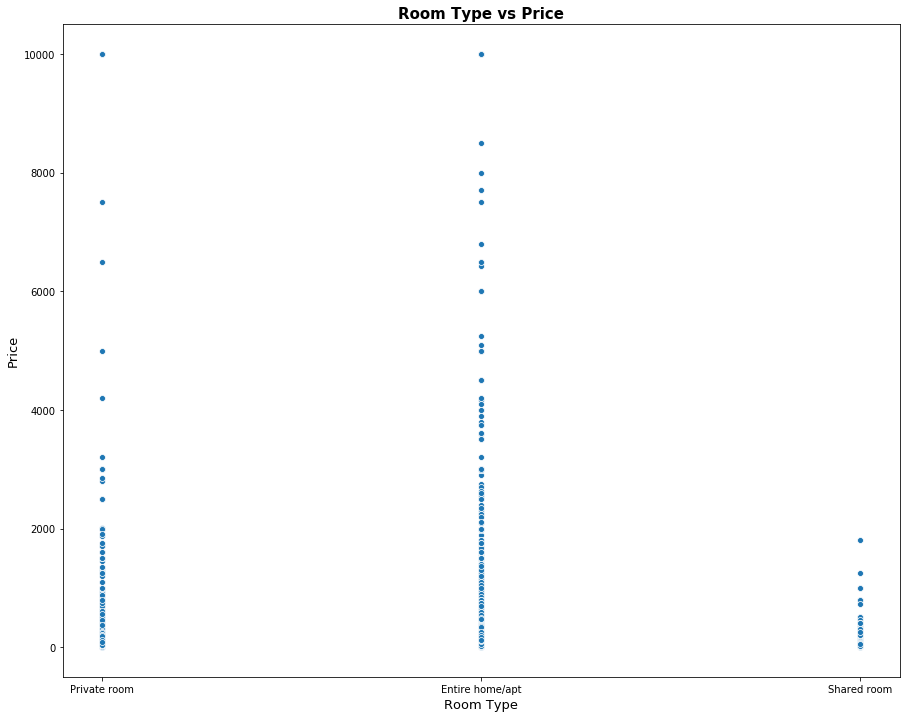

In [60]:
plt.figure(figsize=(15,12))
sns.scatterplot(x='room_type', y='price', data=data)

plt.xlabel("Room Type", size=13)
plt.ylabel("Price", size=13)
plt.title("Room Type vs Price",size=15, weight='bold')

The above graph is about the relationship between price and room type. The Shared room price is always lower than 2000 dollars. On the other hand, the private room and the entire home have the highest price in some.


Text(0.5, 1.0, 'Room Type vs Price vs Neighbourhood Group')

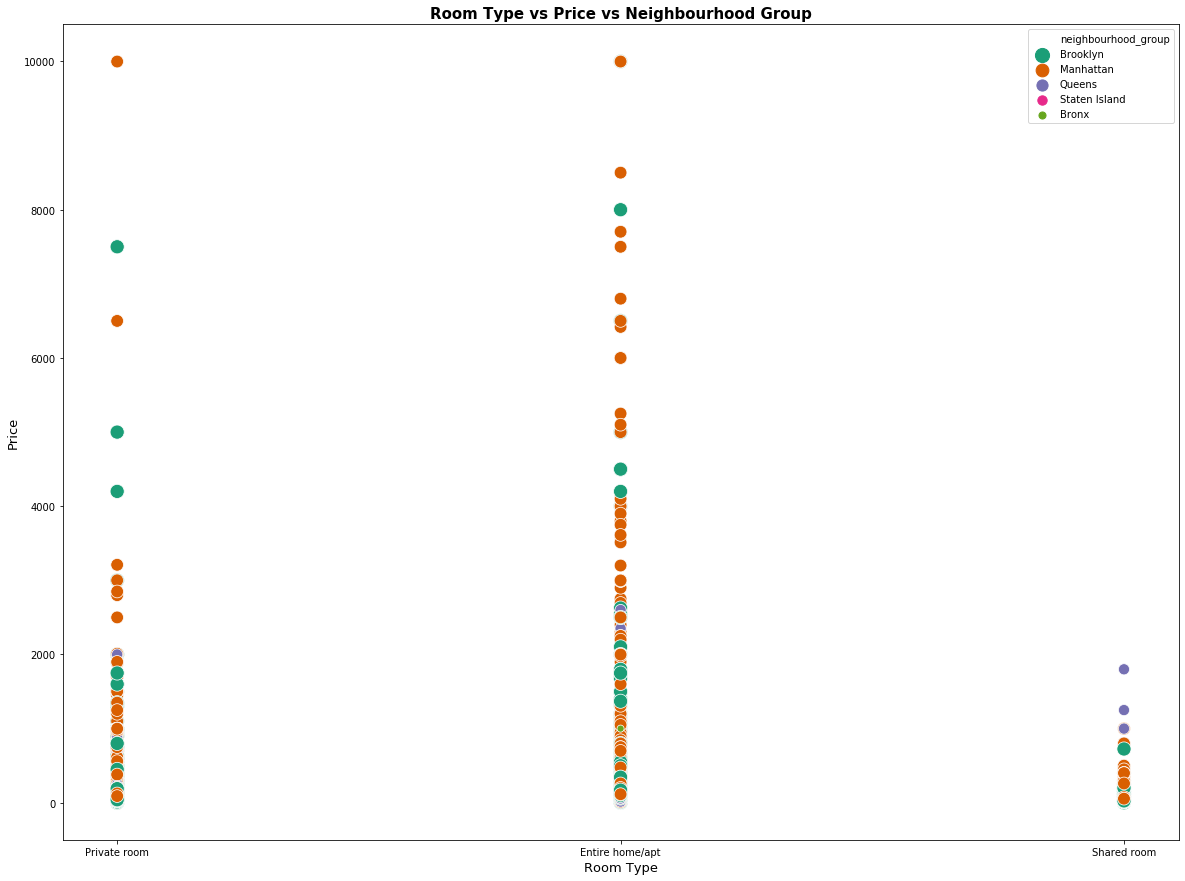

In [61]:
plt.figure(figsize=(20,15))
sns.scatterplot(x="room_type", y="price",
            hue="neighbourhood_group", size="neighbourhood_group",
            sizes=(50, 200), palette="Dark2", data=data)

plt.xlabel("Room Type", size=13)
plt.ylabel("Price", size=13)
plt.title("Room Type vs Price vs Neighbourhood Group",size=15, weight='bold')

Above graph shows details about price and room type based on neighborhood group. The highest price of Private Room and Entire Home/Aptis in the same area which is Manhattan. Also, Brooklyn has very-high prices both in Private Room and Entire Home/Apt. On the other hand, shared room's highest price is in the Queens area


Text(0.5, 1.0, 'Price Distribution Plot')

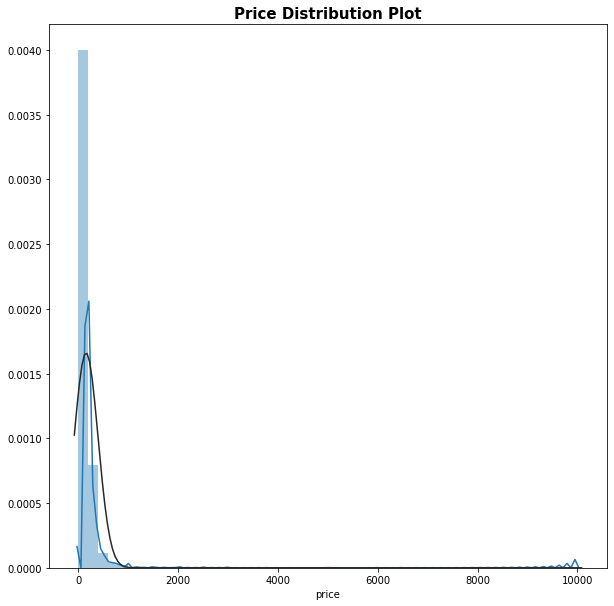

In [62]:
import xlwings as xw

import scipy
plt.figure(figsize=(10,10))
sns.distplot(data['price'], fit=norm)
plt.title("Price Distribution Plot",size=15, weight='bold')

Now we want to predict the location will be avaible 365dayas
let us change the availability_365 to a simple binary means:1 denotes availability_365  and 0 denotes not available.

In [63]:
data['availability_365']=data['availability_365'].apply(lambda x: 1 if x==365 else 0)
data['availability_365'].head()

0    1
1    0
2    1
3    0
4    0
Name: availability_365, dtype: int64

In [64]:
data['availability_365'].value_counts()/len(data['availability_365'])

0    0.973515
1    0.026485
Name: availability_365, dtype: float64

We can see that,97% of the data is not 365 and only 2% is available

IndexError: list index out of range

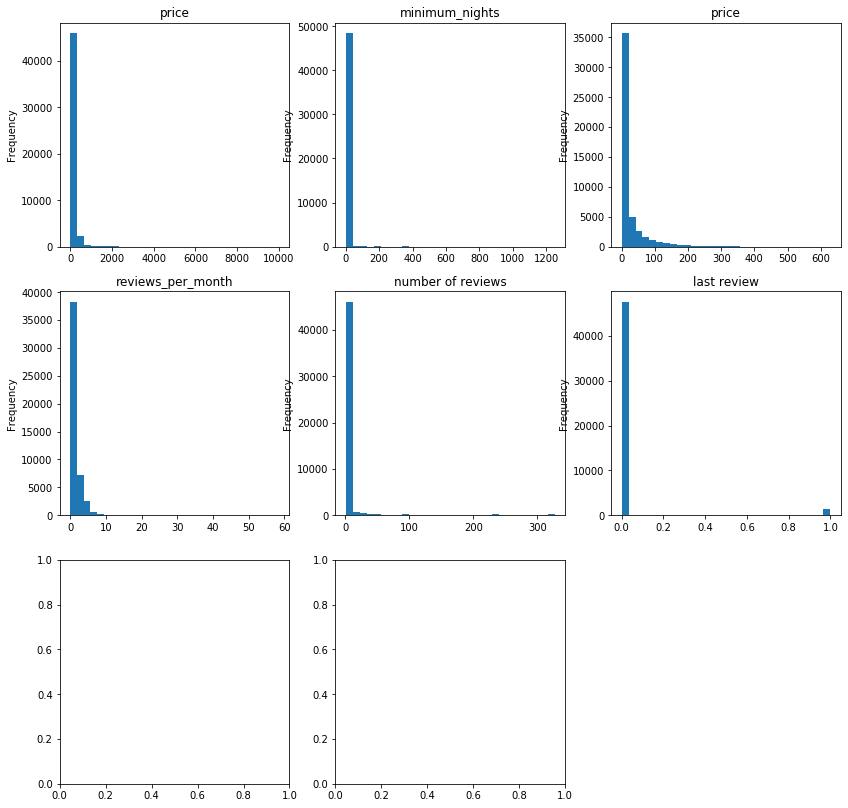

In [65]:
#separate out numerical variables
a=pd.DataFrame(data.dtypes.copy())
b= a[a[0] != 'object'].reset_index()
#drop id and host id:
numeric_vars=b["index"].tolist()[2:]

fig = plt.figure(figsize=(14,14))
ax1 = fig.add_subplot(3, 3, 1)
ax2 = fig.add_subplot(3, 3, 2)
ax3 = fig.add_subplot(3, 3, 3)
ax4 = fig.add_subplot(3, 3, 4)
ax5 = fig.add_subplot(3, 3, 5)
ax6 = fig.add_subplot(3, 3, 6)
ax7 = fig.add_subplot(3, 3, 7)
ax8 = fig.add_subplot(3, 3, 8)

ax1.hist(data[numeric_vars[0]], bins=30)
ax1.set_ylabel("Frequency")
ax1.set_title(numeric_vars[0])

ax2.hist(data[numeric_vars[1]], bins=30)
ax2.set_ylabel("Frequency")
ax2.set_title(numeric_vars[1])

ax3.hist((data[numeric_vars[2]]), bins=30)
ax3.set_ylabel("Frequency")
ax3.set_title('price')

ax4.hist(data[numeric_vars[3]], bins=31)
ax4.set_ylabel("Frequency")
ax4.set_title(numeric_vars[3])

ax5.hist(data[numeric_vars[4]], bins=30)
ax5.set_ylabel("Frequency")
ax5.set_title("number of reviews")

ax6.hist(data[numeric_vars[5]], bins=30)
ax6.set_ylabel("Frequency")
ax6.set_title("last review")

ax7.hist(data[numeric_vars[6]], bins=30)
ax7.set_ylabel("Frequency")
ax7.set_title(numeric_vars[6])

ax8.hist(data[numeric_vars[7]])
ax8.set_ylabel("Frequency")
ax8.set_title(numeric_vars[7])
plt.show()

# 6. Encoding the Features

In [66]:
data.head()

,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,1
1,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,0
2,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,0.00,1,1
3,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,0
4,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0


In [67]:
#one hot Encoding
def onehot_encoder(data,columns,prefixes):
    df=data
    for column,prefix in zip(columns,prefixes):
        dummies=pd.get_dummies(df[column],prefix=prefix)
        df=pd.concat([df,dummies],axis=1)
        df=df.drop(column,axis=1)
    return df
                    

In [68]:
data=onehot_encoder(
    data,
    columns=['neighbourhood_group','neighbourhood','room_type'],
    prefixes=['G','N','R']
)

In [70]:
data.head()

,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,G_Bronx,G_Brooklyn,...,N_Williamsburg,N_Willowbrook,N_Windsor Terrace,N_Woodhaven,N_Woodlawn,N_Woodrow,N_Woodside,R_Entire home/apt,R_Private room,R_Shared room
0,40.64749,-73.97237,149,1,9,0.21,6,1,0,1,...,0,0,0,0,0,0,0,0,1,0
1,40.75362,-73.98377,225,1,45,0.38,2,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,40.80902,-73.94190,150,3,0,0.00,1,1,0,0,...,0,0,0,0,0,0,0,0,1,0
3,40.68514,-73.95976,89,1,270,4.64,1,0,0,1,...,0,0,0,0,0,0,0,1,0,0
4,40.79851,-73.94399,80,10,9,0.10,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0


# 7. Correlation

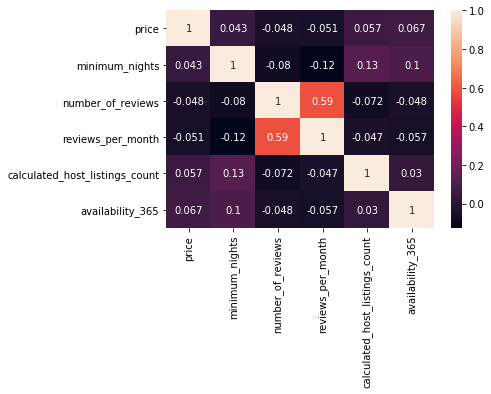

In [71]:
import seaborn as sns
x=data[numeric_vars].corr(method='pearson')
sns.heatmap(x, annot=True)
plt.show()

- Price seems to be positively correlated with longitude meaning that one can expect higher prices as position in NYC moves West. This is expected because Manhattan, which is the most expensive borough of the city, is located on the west side of the city.
- Latitude seems to have lesser effect on the price. However, there is a slight indication of higher prices located in the northern parts of the city.
- Price is also positively correlated with: increasing availability, the fact that the property is rented by a host who lists other properties, and increasing number of minimum nights. Price is negatively correlated with number of reviews and reviews per month, indicating that it is possible that the prior reviews could depress the prices to some extent.

### Other interesting observations:
- Calculated host lisitng count is positively correlated with minimum nights and availability_365 indicating that hosts who list more than one property may be more strategic rather than opportunisitic about their rentals. That may attempt to maximize the amount of time a single renter stays at their property to minimize turnover cost. They also tend to maximize the amount of time the property is being rented.

In [75]:
data.head()

,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,G_Bronx,G_Brooklyn,...,N_Williamsburg,N_Willowbrook,N_Windsor Terrace,N_Woodhaven,N_Woodlawn,N_Woodrow,N_Woodside,R_Entire home/apt,R_Private room,R_Shared room
0,40.64749,-73.97237,149,1,9,0.21,6,1,0,1,...,0,0,0,0,0,0,0,0,1,0
1,40.75362,-73.98377,225,1,45,0.38,2,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,40.80902,-73.94190,150,3,0,0.00,1,1,0,0,...,0,0,0,0,0,0,0,0,1,0
3,40.68514,-73.95976,89,1,270,4.64,1,0,0,1,...,0,0,0,0,0,0,0,1,0,0
4,40.79851,-73.94399,80,10,9,0.10,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0


# 8. Preparing X and y and Splitting  into training and test datasets.


## Preparing X and y using pandas

In [77]:
X=data.drop(['availability_365'], axis=1)
X.head()

,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,G_Bronx,G_Brooklyn,G_Manhattan,...,N_Williamsburg,N_Willowbrook,N_Windsor Terrace,N_Woodhaven,N_Woodlawn,N_Woodrow,N_Woodside,R_Entire home/apt,R_Private room,R_Shared room
0,40.64749,-73.97237,149,1,9,0.21,6,0,1,0,...,0,0,0,0,0,0,0,0,1,0
1,40.75362,-73.98377,225,1,45,0.38,2,0,0,1,...,0,0,0,0,0,0,0,1,0,0
2,40.80902,-73.94190,150,3,0,0.00,1,0,0,1,...,0,0,0,0,0,0,0,0,1,0
3,40.68514,-73.95976,89,1,270,4.64,1,0,1,0,...,0,0,0,0,0,0,0,1,0,0
4,40.79851,-73.94399,80,10,9,0.10,1,0,0,1,...,0,0,0,0,0,0,0,1,0,0


In [78]:
y=data['availability_365']
y.head()

0    1
1    0
2    1
3    0
4    0
Name: availability_365, dtype: int64

In [79]:
X.columns

Index(['latitude', 'longitude', 'price', 'minimum_nights', 'number_of_reviews',
       'reviews_per_month', 'calculated_host_listings_count', 'G_Bronx',
       'G_Brooklyn', 'G_Manhattan',
       ...
       'N_Williamsburg', 'N_Willowbrook', 'N_Windsor Terrace', 'N_Woodhaven',
       'N_Woodlawn', 'N_Woodrow', 'N_Woodside', 'R_Entire home/apt',
       'R_Private room', 'R_Shared room'],
      dtype='object', length=236)

## Standardization
Standardize features by removing the _mean_ and scaling to _unit standard deviation_.

In [83]:
scaler=StandardScaler()
x=scaler.fit_transform(X)


In [84]:
x

array([[-1.4938492 , -0.43765209, -0.01549307, ..., -1.04013392,
         1.09089297, -0.15588723],
       [ 0.45243602, -0.68463915,  0.30097355, ...,  0.96141466,
        -0.91668021, -0.15588723],
       [ 1.46839948,  0.22249666, -0.01132904, ..., -1.04013392,
         1.09089297, -0.15588723],
       ...,
       [ 1.57348017,  0.07582101, -0.15707024, ...,  0.96141466,
        -0.91668021, -0.15588723],
       [ 0.52377353, -0.84388081, -0.4069123 , ..., -1.04013392,
        -0.91668021,  6.41489377],
       [ 0.64352518, -0.8050995 , -0.2611711 , ..., -1.04013392,
         1.09089297, -0.15588723]])

## Splitting X and y into training and test datasets.

In [85]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.7, random_state = 200)


# 9. Machine Learning Algorithmns

# 9.1 Logistic Regression

In [86]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression()
LR.fit(x_train,y_train)
LR.score(x_test,y_test)
Accuracy = LR.score(x_train, y_train)

C:\Users\T.R.BASUDE\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [87]:
print ("Accuracy in the training data: ", Accuracy*100, "%")

Accuracy in the training data:  97.50477229342786 %


In [88]:
accuracy = LR.score(x_test, y_test)
print ("Accuracy in the test data", accuracy*100, "%")

Accuracy in the test data 97.15721506413065 %


# 9.2 KNN Classifier

In [91]:
from sklearn.neighbors import KNeighborsClassifier

knn_clf = KNeighborsClassifier()
knn_clf.fit(x_train, y_train)
knn_clf.score(x_test,y_test)
Accuracy = knn_clf.score(x_test, y_test)

In [92]:
print ("Accuracy in the testing data: ", Accuracy*100, "%")

Accuracy in the testing data:  97.18058842434336 %


# 9.3 Support Vector Machine

In [93]:
from sklearn.svm import SVC
svm_clf = SVC(kernel='rbf', gamma=0.1, C=1.0)
svm_clf.fit(x_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [94]:
svm_clf.score(x_test,y_test)
Accuracy = svm_clf.score(x_test, y_test)
print ("Accuracy in the testing data: ", Accuracy*100, "%")

Accuracy in the testing data:  97.30037689543343 %


# 10. Predictions

In [95]:
x3 = X.iloc[65:69, :]
x3

,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,G_Bronx,G_Brooklyn,G_Manhattan,...,N_Williamsburg,N_Willowbrook,N_Windsor Terrace,N_Woodhaven,N_Woodlawn,N_Woodrow,N_Woodside,R_Entire home/apt,R_Private room,R_Shared room
65,40.75979,-73.99119,52,30,191,1.65,1,0,0,1,...,0,0,0,0,0,0,0,0,1,0
66,40.67343,-73.98338,225,3,4,0.16,1,0,1,0,...,0,0,0,0,0,0,0,1,0,0
67,40.72649,-73.97904,80,1,338,4.72,2,0,0,1,...,0,0,0,0,0,0,0,0,1,0
68,40.70933,-73.96792,275,1,148,1.40,1,0,1,0,...,1,0,0,0,0,0,0,1,0,0


In [96]:
pred2= LR.predict(x3)
pred2

array([0, 1, 0, 0], dtype=int64)

The above prediction done by logistic regression states that only  second sample has availability of 365 days

In [97]:
pred3= knn_clf.predict(x3)
pred3

array([0, 0, 0, 0], dtype=int64)

The above prediction done by KNN Classifier states that none has availability of 365 days

In [98]:
pred4= svm_clf.predict(x3)
pred4

array([0, 0, 0, 0], dtype=int64)

The above prediction done by SVM states that none has availability of 365 days